In [17]:
import pandas as pd

# Load the uploaded dataset
file_path = 'clean_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,california,3.90,6.7,962.0,100,1.0,0
1,Admit,florida,3.80,1.4,969.0,97,1.0,4
2,Admit,colorado,3.60,0.9,969.0,97,0.0,2
3,Admit,california,3.88,1.5,967.0,95,1.0,5
4,Admit,california,3.70,1.2,969.0,94,1.0,2


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import MinMaxScaler
df_normalized = df.copy()

scaler = MinMaxScaler()
df_normalized[['GPA','TestScore', 'WritingScore','WorkExp']] = scaler.fit_transform(df_normalized[['GPA','TestScore', 'WritingScore','WorkExp']])
df_filtered = df_normalized[df_normalized['Decision'] != 'Waitlist']
df_filtered['Admission'] = df_filtered['Decision'].apply(lambda x: 1 if x == 'Admit' else 0)

X = df_filtered[['GPA', 'WorkExp', 'TestScore', 'WritingScore', 'Gender', 'VolunteerLevel']]
y = df_filtered['Admission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Function to calculate metrics
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

# Collect performance metrics
metrics_log = get_metrics(y_test, y_pred_log)


# Print model performance comparison
print("Model Performance Comparison:")
print(metrics_log)



Model Performance Comparison:
{'Accuracy': 0.9411764705882353, 'Precision': 0.9166666666666666, 'Recall': 1.0, 'F1 Score': 0.9565217391304348}


/var/folders/wc/9wclntk940q3y52dpvt1g_s80000gn/T/ipykernel_46621/1004624578.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Admission'] = df_filtered['Decision'].apply(lambda x: 1 if x == 'Admit' else 0)


In [19]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_feature_importance = pd.Series(log_model.coef_[0], index=X.columns).sort_values(ascending=False)


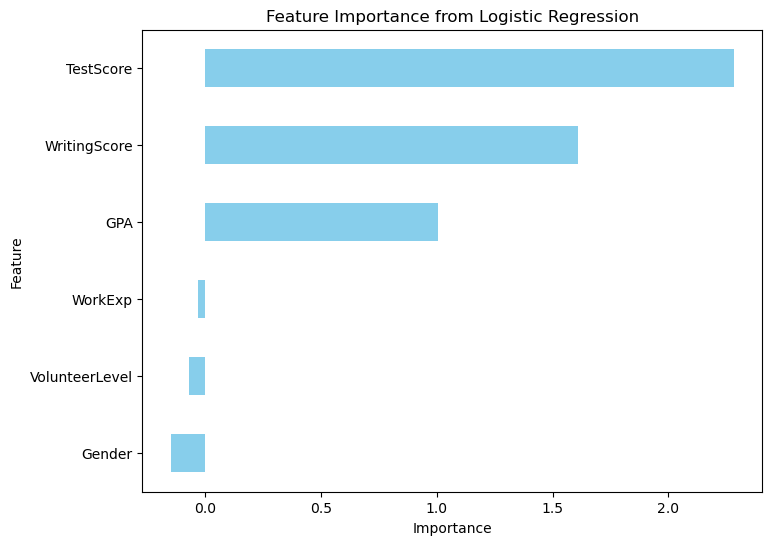

In [20]:
import matplotlib.pyplot as plt

# Visualize feature importance
plt.figure(figsize=(8, 6))
log_feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('viz/Logistic Result.png')
plt.show()


In [21]:
df_filtered

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel,Admission
0,Admit,california,0.981132,0.728261,0.967890,1.000000,1.0,0,1
1,Admit,florida,0.918239,0.152174,1.000000,0.931818,1.0,4,1
2,Admit,colorado,0.792453,0.097826,1.000000,0.931818,0.0,2,1
3,Admit,california,0.968553,0.163043,0.990826,0.886364,1.0,5,1
4,Admit,california,0.855346,0.130435,1.000000,0.863636,1.0,2,1
5,Admit,florida,0.981132,0.510870,0.963303,0.840909,1.0,1,1
6,Admit,california,0.855346,0.152174,0.986239,0.863636,1.0,0,1
7,Admit,florida,1.000000,0.086957,1.000000,0.977273,1.0,4,1
8,Admit,colorado,0.792453,0.130435,0.990826,0.863636,1.0,2,1
9,Admit,california,0.849057,0.347826,0.990826,0.840909,0.0,3,1


In [22]:
# Predict for waitlist students using the updated logistic regression model
waitlist_df = df_normalized[df_normalized['Decision'] == 'Waitlist']
X_waitlist = waitlist_df[['GPA', 'WorkExp', 'TestScore', 'WritingScore', 'Gender', 'VolunteerLevel']]
waitlist_predictions = log_model.predict(X_waitlist)
waitlist_df['Predicted_Admission'] = waitlist_predictions

# Output waitlist predictions
waitlist_df[['GPA', 'WorkExp', 'TestScore', 'WritingScore', 'Gender', 'VolunteerLevel', 'Predicted_Admission']]


/var/folders/wc/9wclntk940q3y52dpvt1g_s80000gn/T/ipykernel_46621/2960046581.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waitlist_df['Predicted_Admission'] = waitlist_predictions


,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel,Predicted_Admission
55,0.666667,0.206522,0.495413,0.727273,0.0,4,0
56,0.698113,0.510870,0.532110,0.340909,0.0,3,0
57,0.729560,0.184783,0.541284,0.386364,0.0,2,0
58,0.761006,0.239130,0.527523,0.409091,1.0,1,0
59,0.672956,0.130435,0.536697,0.659091,0.0,0,1
60,0.748428,0.184783,0.541284,0.704545,1.0,2,0
61,0.729560,0.380435,0.541284,0.613636,0.0,4,0
62,0.660377,0.195652,0.527523,0.590909,1.0,5,0
63,0.742138,0.293478,0.477064,0.704545,1.0,3,0
64,0.723270,0.141304,0.527523,0.681818,0.0,5,0


In [23]:
waitlist_df["Admit_Probability"] = log_model.predict_proba(X_waitlist)[:, 1]

df_ranked = waitlist_df.sort_values(by='Admit_Probability', ascending=False)

df_ranked[['Admit_Probability']]


/var/folders/wc/9wclntk940q3y52dpvt1g_s80000gn/T/ipykernel_46621/1383651891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waitlist_df["Admit_Probability"] = log_model.predict_proba(X_waitlist)[:, 1]


,Admit_Probability
77,0.521880
59,0.512833
72,0.480787
60,0.480538
65,0.463839
66,0.461206
73,0.459786
69,0.457534
75,0.457523
55,0.446089
